# Capstone 1: Analytic Report and Research Proposal 

by Eva Rubin
August 2018

Data set includes nutrition information and ratings on 80 hot and cold cereal products from seven different manufacturers: American Home Food Products, General Mills, Kelloggs, Nabisco, Post, Quaker Oats, and Ralston Purina.  Ratings source is unknown.

It is interesting to understand the criteria used for rating these cereals.  Given often contradictory advice and assertions of "healthy" food products, it's important to understand the criteria used to rate the food we eat so we can judge whether or not a rating source is reliable and trusted.

By understanding the inherent values that guide the rating, then it is possible to make more informed decisions regarding assumptions about what makes a cereal "healthy" vs. "unhealthy"

Limitations: the rating source for this dataset is unknown.

Research What are the characteristics of the cereals that result in the highest rating?

Data source: https://www.kaggle.com/crawford/80-cereals/home

In [239]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [240]:
#open tsv or csv tab delimited file
#https://stackoverflow.com/questions/48583002/how-to-open-a-tsv-file-in-jupyter-jupyter-notebook-tried-suggestions-but-it-d?rq=1
#df = pd.read_csv('/Users/evarubin/Dev/thinkful/data/article_ephys_metadata_curated.csv', sep='\t')

#set data file
df = pd.read_csv('/Users/evarubin/Dev/thinkful/data/cereal.csv', sep='\t')

#show columns
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [241]:
# View first 5 rows of data
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Exploring the data...

In [242]:
#View summary stats of numeric variables
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [243]:
# Explore correlations between variables
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


### Checking out hot vs. cold cereals

In [244]:
df.type.value_counts()

C    74
H     3
Name: type, dtype: int64

So few hot cereals, won't look at differences between hot vs cold cereals

### Checking out the representation of cereals by the various manufacturers: Kellogg's and General Mills have the highest number of cereals represented in the data.

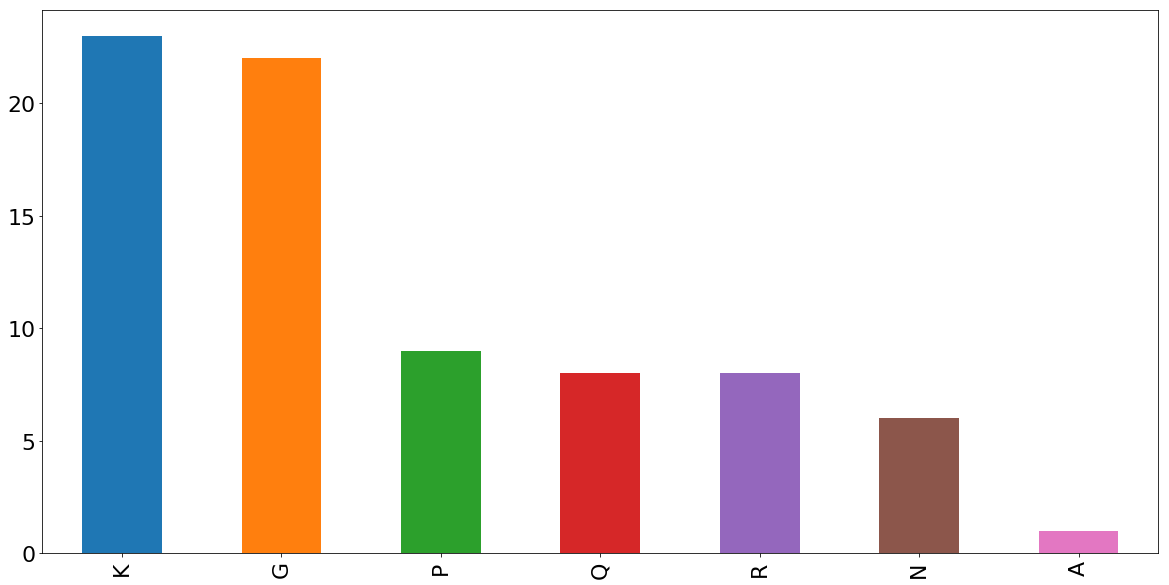

In [245]:
#bar chart on manufacturers df.mfr.value_counts().plot(kind = "bar")
df.mfr.value_counts().plot(kind = "bar");

### Group Manufacturers into Big and Small to compare

In [246]:
df['Manufacturer'] = df['mfr'].astype('category')
df['Manufacturer'] = df['Manufacturer'].cat.set_categories(["K","G","P", 
                                                   "Q", "R", "N", "A"])

In [247]:
df["BigMan"] = df["Manufacturer"].isin(["K", "G"])
df["SmallMan"] = df["Manufacturer"].isin(["P", "Q", "R", "N", "A"])

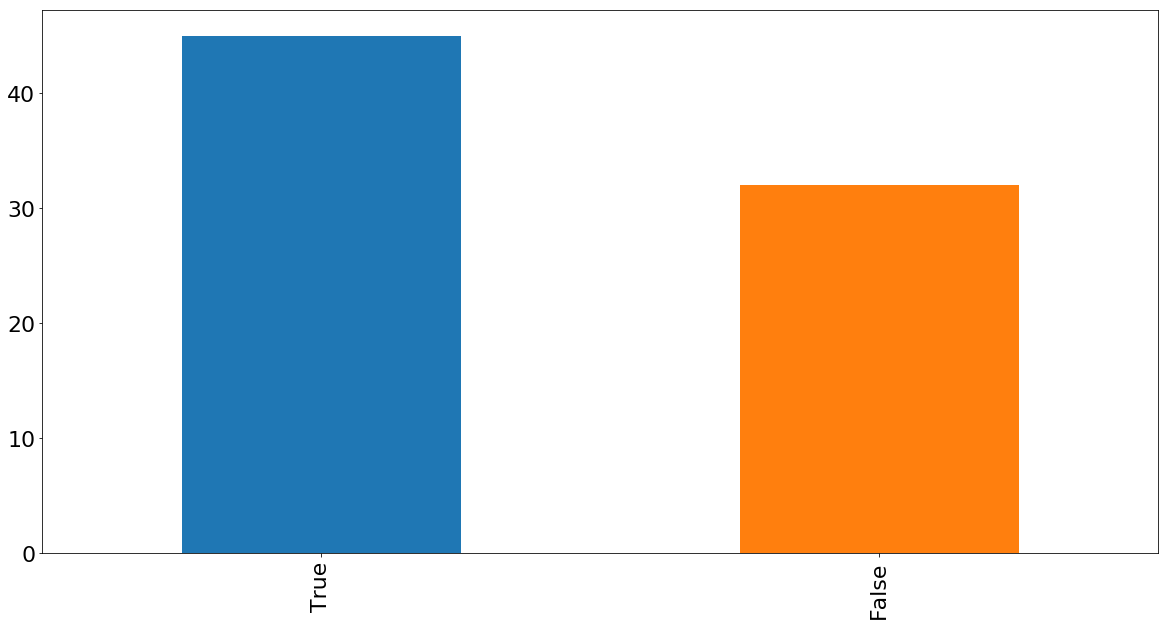

In [248]:
df.BigMan.value_counts().plot(kind = "bar");

In [249]:
# How large is each group?
print('Big manufacturer sample size:', len(df[df.BigMan == 1]))
print('Small manufacturer sample size:', len(df[df.SmallMan == 1]))
print('Big manufacturer proportion:', df.BigMan.mean())
print()

Big manufacturer sample size: 45
Small manufacturer sample size: 32
Big manufacturer proportion: 0.5844155844155844



In [250]:
# Get subset df with only Kellogg and General Mills
bm = df.loc[df['Manufacturer'].isin(['K', 'G'])]

In [251]:
# Get subset of df with Post, Quaker, Ralston Purina, Nabisco, and American Home Food Products
sm = df.loc[df['Manufacturer'].isin(["P", "Q", "R", "N", "A"])]

### Is there a relationship between big vs. small manufacturer group and rating?

In [252]:
#Correlation between being a big manufacturer and rating
bm['rating'].mean()

39.368297133333336

In [253]:
#Correlation between being a small manufacturer and rating
sm['rating'].mean()

47.302684781249994

### There is a higher rating for the smaller manufacturer group than the big manufacturer group.  Is there any one manufacturer that represents these higher ratings?

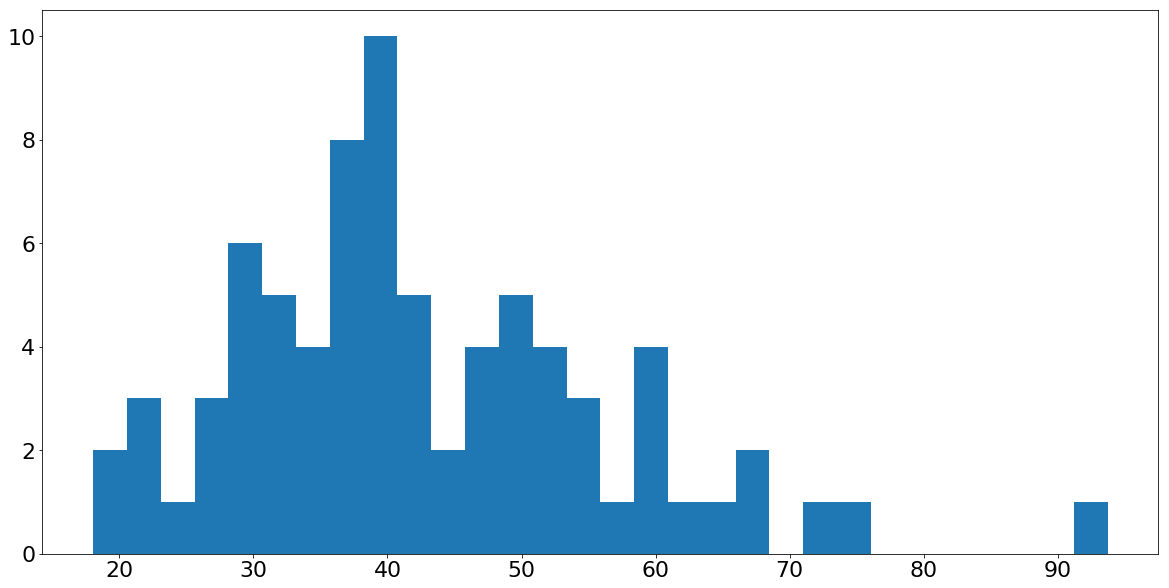

In [254]:
# Check out the distribution of the ratings
plt.hist(df['rating'], bins=30);

### The ratings follow a mostly normal curve, but also show a large gap between most of the cereals and one outlier with ratings above 90.  What cereals represent these higher ratings and what characteristics of these highly rated cereals might indicate criteria for cereal ratings?

In [255]:
# Top rated cereal
df_outlier = df.loc[(df['rating'] > 90)]
outlier_cereal = df_outlier.groupby(
    ['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']).agg({'rating':'count'})

outlier_cereal

,,,,,,,,,,,,,,,,rating
name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912,1


### Reviewing the descriptive statistics, the highest rated single cereal has the most fiber: 14; the fewest calories: 50; the least sugars: 0; the highest potassium: 330.

These characteristics likely make up the criteria that ratings are based upon, but let's test this hypothesis against the highest rated cereals by any one manufacturer?

### Which manufacturer tends to produce more highly rated cereals?

In [256]:
# Identify manufacturers that represent highest mean ratings

# Use get_dummies of df and it will create new columns with dummy variables
mfr_dummies = pd.get_dummies(df, columns=['mfr'])

In [257]:
# How many cereals do each manufacture produce in the sample?
print('General Mills cereals:', len(df[mfr_dummies['mfr_G'] == 1]))
print('Kelloggs cereals:', len(df[mfr_dummies['mfr_K'] == 1]))
print('Nabisco cereals:', len(df[mfr_dummies['mfr_N'] == 1]))
print('Post cereals:', len(df[mfr_dummies['mfr_P'] == 1]))
print('Quaker Oats cereals:', len(df[mfr_dummies['mfr_Q'] == 1]))
print('Ralston Purina cereals:', len(df[mfr_dummies['mfr_R'] == 1]))
print('American Home Food Product cereals:', len(df[df['mfr'] == 'A']))
print()

General Mills cereals: 22
Kelloggs cereals: 23
Nabisco cereals: 6
Post cereals: 9
Quaker Oats cereals: 8
Ralston Purina cereals: 8
American Home Food Product cereals: 1



In [277]:
mfr_dummies[mfr_dummies.columns[1:]].corr()['rating'][-7:].sort_values(ascending=False)

mfr_N    0.527063
mfr_A    0.100155
mfr_K    0.064196
mfr_Q    0.006107
mfr_P   -0.025025
mfr_R   -0.027393
mfr_G   -0.370699
Name: rating, dtype: float64

### Nabisco has the strongest correlation with ratings for cereals. Do Nabisco manufactured cereals follow the pattern of high fiber, low calories, low sugar, and high potassium in the highest rated single cereal?

In [278]:
# Fiber: highest correlation
mfr_dummies[mfr_dummies.columns[1:]].corr()['fiber'][-7:].sort_values(ascending=False)

mfr_N    0.226887
mfr_K    0.161841
mfr_P    0.096155
mfr_R   -0.039826
mfr_A   -0.104249
mfr_Q   -0.117120
mfr_G   -0.234842
Name: fiber, dtype: float64

In [279]:
# Sugars: lowest correlation with sugars
mfr_dummies[mfr_dummies.columns[1:]].corr()['sugars'][-7:].sort_values(ascending=True)

mfr_N   -0.334993
mfr_Q   -0.128930
mfr_A   -0.101880
mfr_R   -0.061461
mfr_K    0.095050
mfr_G    0.147871
mfr_P    0.152881
Name: sugars, dtype: float64

In [280]:
# Potassium: highest correlation with potassium
mfr_dummies[mfr_dummies.columns[1:]].corr()['potass'][-7:].sort_values(ascending=False)

mfr_N    0.100928
mfr_P    0.091492
mfr_K    0.064188
mfr_A   -0.001746
mfr_R   -0.032828
mfr_G   -0.096898
mfr_Q   -0.104344
Name: potass, dtype: float64

In [281]:
# Protein: highest correlation with protein
mfr_dummies[mfr_dummies.columns[1:]].corr()['protein'][-7:].sort_values(ascending=False)

mfr_A    0.153401
mfr_N    0.076942
mfr_K    0.064035
mfr_Q    0.024903
mfr_R   -0.014230
mfr_P   -0.033786
mfr_G   -0.132155
Name: protein, dtype: float64

In [282]:
# Fats: 2nd to lowest correlation with fat
mfr_dummies[mfr_dummies.columns[1:]].corr()['fat'][-7:].sort_values(ascending=True)

mfr_K   -0.263875
mfr_N   -0.246047
mfr_P   -0.045151
mfr_A   -0.001490
mfr_R    0.080710
mfr_G    0.221789
mfr_Q    0.250976
Name: fat, dtype: float64

In [283]:
# Carbohydrates: 2nd to lowest correlation with carbohydrates
mfr_dummies[mfr_dummies.columns[1:]].corr()['carbo'][-7:].sort_values(ascending=True)

mfr_Q   -0.368242
mfr_P   -0.117687
mfr_G    0.019321
mfr_A    0.037847
mfr_K    0.081832
mfr_N    0.095914
mfr_R    0.242504
Name: carbo, dtype: float64

In [284]:
# Vitamins: Lowest correlation with vitamins
mfr_dummies[mfr_dummies.columns[1:]].corr()['vitamins'][-7:].sort_values(ascending=False)

mfr_G    0.198895
mfr_K    0.192166
mfr_A   -0.016778
mfr_R   -0.049805
mfr_P   -0.053214
mfr_Q   -0.241556
mfr_N   -0.260795
Name: vitamins, dtype: float64

In [285]:
# Calories: Lowest correlation with calories
mfr_dummies[mfr_dummies.columns[1:]].corr()['calories'][-7:].sort_values(ascending=True)

mfr_N   -0.303605
mfr_Q   -0.209030
mfr_A   -0.040788
mfr_P    0.037697
mfr_K    0.061110
mfr_R    0.142780
mfr_G    0.146392
Name: calories, dtype: float64

In [286]:
# Sodium: Lowest correlation with sodium
mfr_dummies[mfr_dummies.columns[1:]].corr()['sodium'][-7:].sort_values(ascending=True)

mfr_N   -0.426439
mfr_Q   -0.274636
mfr_A   -0.219917
mfr_P   -0.059250
mfr_K    0.118381
mfr_R    0.157196
mfr_G    0.309668
Name: sodium, dtype: float64

### Compared to any of the other manufacturer cereals, Nabisco's cereals have the highest correlation with fiber and protein and the lowest correlation with sugars, calories, and sodium.

The highest rated single cereal has (per serving) the most fiber: 14; the fewest calories: 50; the least sugars: 0; the highest potassium: 330.  These characteristics likely make up the criteria that ratings are based upon. 

Correlations between Nabisco manufactured cereals tend to match the expected pattern of the highest rated single cereal on average: highest fiber, fewest calories, least sugars, and highest potassium.  Nabisco manufactured cereals also tend to have the highest protein amounts.

### Is there a significant difference in the mean characteristics of Nabisco cereals and other manufacturer cereals?

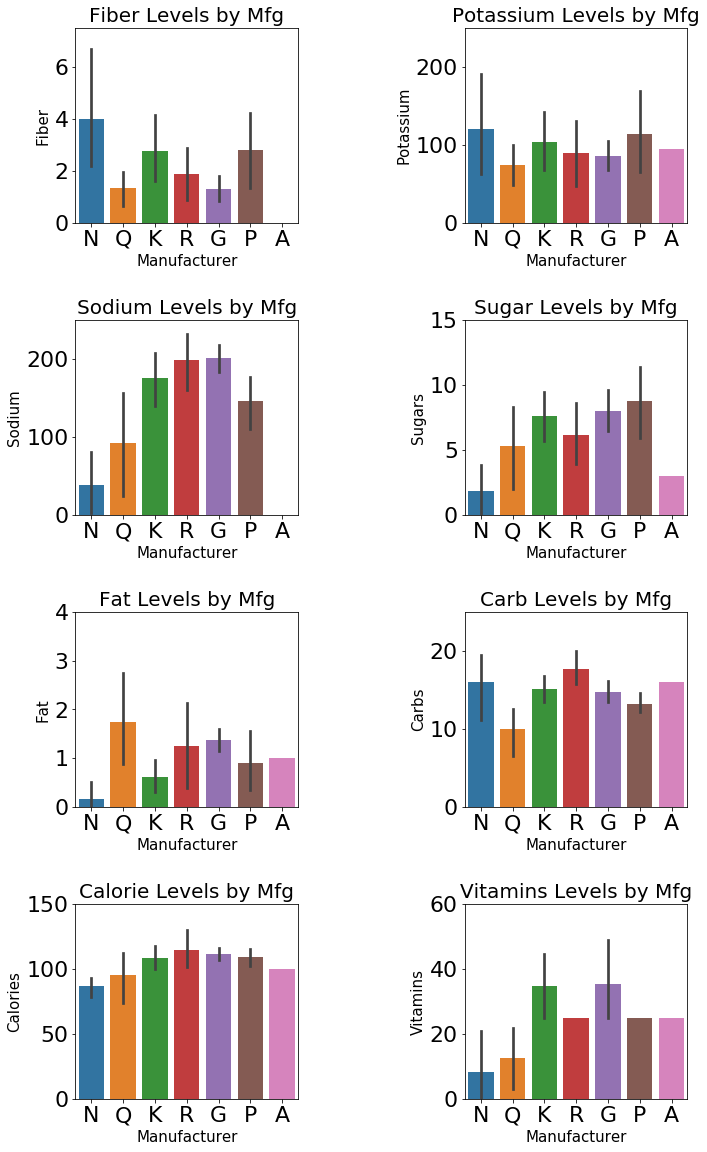

In [268]:
# Subplots to look at differences between cereals in means of 
plt.figure(figsize=(10, 5))

#Fiber
plt.subplot(4, 2, 1)
plt.ylim(0,7.5)
sns.barplot(x='mfr', y='fiber', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Fiber',fontsize= 15)
plt.title('Fiber Levels by Mfg',fontsize= 20);

# Potassium
plt.subplot(4, 2, 2)
plt.ylim(0,250)
sns.barplot(x='mfr', y='potass', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Potassium',fontsize= 15)
plt.title('Potassium Levels by Mfg',fontsize= 20)

#Sodium
plt.subplot(4, 2, 3)
plt.ylim(0,250)
sns.barplot(x='mfr', y='sodium', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Sodium',fontsize= 15)
plt.title('Sodium Levels by Mfg',fontsize= 20);

# Sugar
plt.subplot(4, 2, 4)
plt.ylim(0,15)
sns.barplot(x='mfr', y='sugars', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Sugars',fontsize= 15)
plt.title('Sugar Levels by Mfg',fontsize= 20)

# Fat
plt.subplot(4, 2, 5)
plt.ylim(0,4)
sns.barplot(x='mfr', y='fat', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Fat',fontsize= 15)
plt.title('Fat Levels by Mfg',fontsize= 20)

# Carbs
plt.subplot(4, 2, 6)
plt.ylim(0,25)
sns.barplot(x='mfr', y='carbo', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Carbs',fontsize= 15)
plt.title('Carb Levels by Mfg',fontsize= 20)

# Calories
plt.subplot(4, 2, 7)
plt.ylim(0,150)
sns.barplot(x='mfr', y='calories', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Calories',fontsize= 15)
plt.title('Calorie Levels by Mfg',fontsize= 20)

# Vitamins
plt.subplot(4, 2, 8)
plt.ylim(0,60)
sns.barplot(x='mfr', y='vitamins', data=df);
plt.xlabel('Manufacturer',fontsize= 15)
plt.ylabel('Vitamins',fontsize= 15)
plt.title('Vitamins Levels by Mfg',fontsize= 20)

plt.subplots_adjust(top=3, bottom=.025, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.75)

plt.show()

### Is there a statistically significant difference in Nabisco manufactured cereal characteristics as compared to all other manufacturer cereals represented in the sample?

In [269]:
# Is there a significant difference in the mean fiber amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].fiber, df[df.mfr != 'N'].fiber)

Ttest_indResult(statistic=2.017509748929509, pvalue=0.047220493588521366)

In [270]:
# Is there a significant difference in the mean potassium amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].potass, df[df.mfr != 'N'].potass)

Ttest_indResult(statistic=0.8785492631453837, pvalue=0.3824517034504037)

In [271]:
# Is there a significant difference in the mean sodium amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].sodium, df[df.mfr != 'N'].sodium)

Ttest_indResult(statistic=-4.082925352377544, pvalue=0.00011011072704564203)

In [272]:
# Is there a significant difference in the mean sugar amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].sugars, df[df.mfr != 'N'].sugars)

Ttest_indResult(statistic=-3.0790238494795314, pvalue=0.0029011412396509166)

In [273]:
# Is there a significant difference in the mean fat amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].fat, df[df.mfr != 'N'].fat)

Ttest_indResult(statistic=-2.198412220393365, pvalue=0.031004364650240507)

In [274]:
# Is there a significant difference in the mean carb amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].carbo, df[df.mfr != 'N'].carbo)

Ttest_indResult(statistic=0.8344834037393463, pvalue=0.4066588067540863)

In [275]:
# Is there a significant difference in the mean calorie amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].calories, df[df.mfr != 'N'].calories)

Ttest_indResult(statistic=-2.7595544440177537, pvalue=0.007269818586206901)

In [276]:
# Is there a significant difference in the mean sugar amount in Nabisco cereals?
stats.ttest_ind(df[df.mfr == 'N'].vitamins, df[df.mfr != 'N'].vitamins)

Ttest_indResult(statistic=-2.339508171763163, pvalue=0.021973208481188743)

### As compared to all other manufacturers in the sample, Nabisco manufactured cereals have statistically different levels of:
- Fiber
- Potassium
- Sodium
- Sugars
- Fat
- Calories
- Vitamins

### As compared to all other manufacturers in the sample, Nabsico manufactured cereals do not have statistically different levels of:
- Carbohydrates

## Conclusion:

Based on the analysis of the cereal data, it appears that the criteria used to rate the 80 cereals in this sample include:
- High fiber
- Low calories
- Low sugar
- High potassium

Nabsico manufactured cereals have the highest mean rating of cereals in this sample.  Nabisco cereal characteristics match the expected criteria based on the highest rated single cereal.  In addition, Nabisco cereal characteristics also show a statistically significant difference in the means of these characteristics as compared to other cereal manufacturers in the sample.

## Proposal for further research:

Potential future research might include looking at time series forecasting or trending year over year changes in manufacturer cereals.  In addition, it might be interesting to predict ratings based on data.  Lastly, it might be interesting to explore different styles in plotting and visualization.